# Puerta de Pauli-Y (Y)

### Explicación de la puerta 

Se invierte el estado de qubit al igual que en la puerta X, pero además se realiza una inversión de fase. Su representación matricial es: 

$$
Y =\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
$$



### Circuito de la puerta con Qiskit y Matplot


Circuito con Pauli Y: 


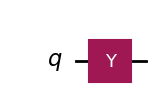

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

#Circuito básico de Pauli Y (sin medir)
qc = QuantumCircuit(1)
qc.y(0)

print("\nCircuito con Pauli Y: ")
qc.draw('mpl')

### Visualización de la esfera de Bloch

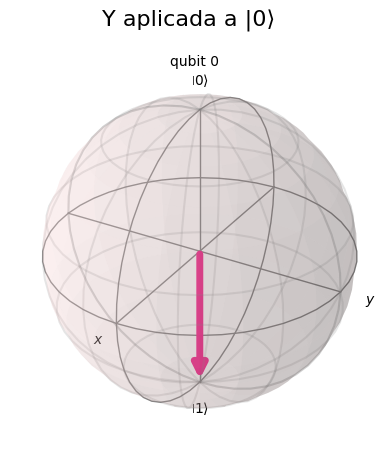

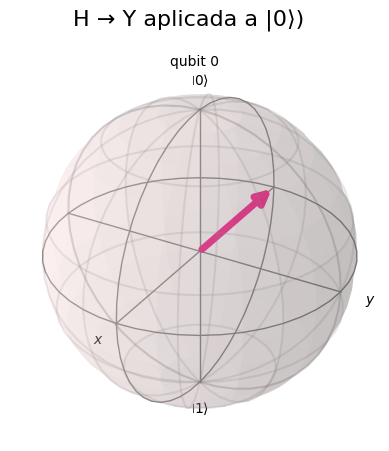

In [22]:
qc_with_H = QuantumCircuit(1)
qc_with_H.h(0)  
qc_with_H.y(0)  


state_not_H = Statevector.from_instruction(qc)
state_with_H = Statevector.from_instruction(qc_with_H)


display(plot_bloch_multivector(state_not_H, title="Y aplicada a |0⟩"))

display(plot_bloch_multivector(state_with_H, title="H → Y aplicada a |0⟩)"))


### Ejecución del circuito tras 1024 shots 

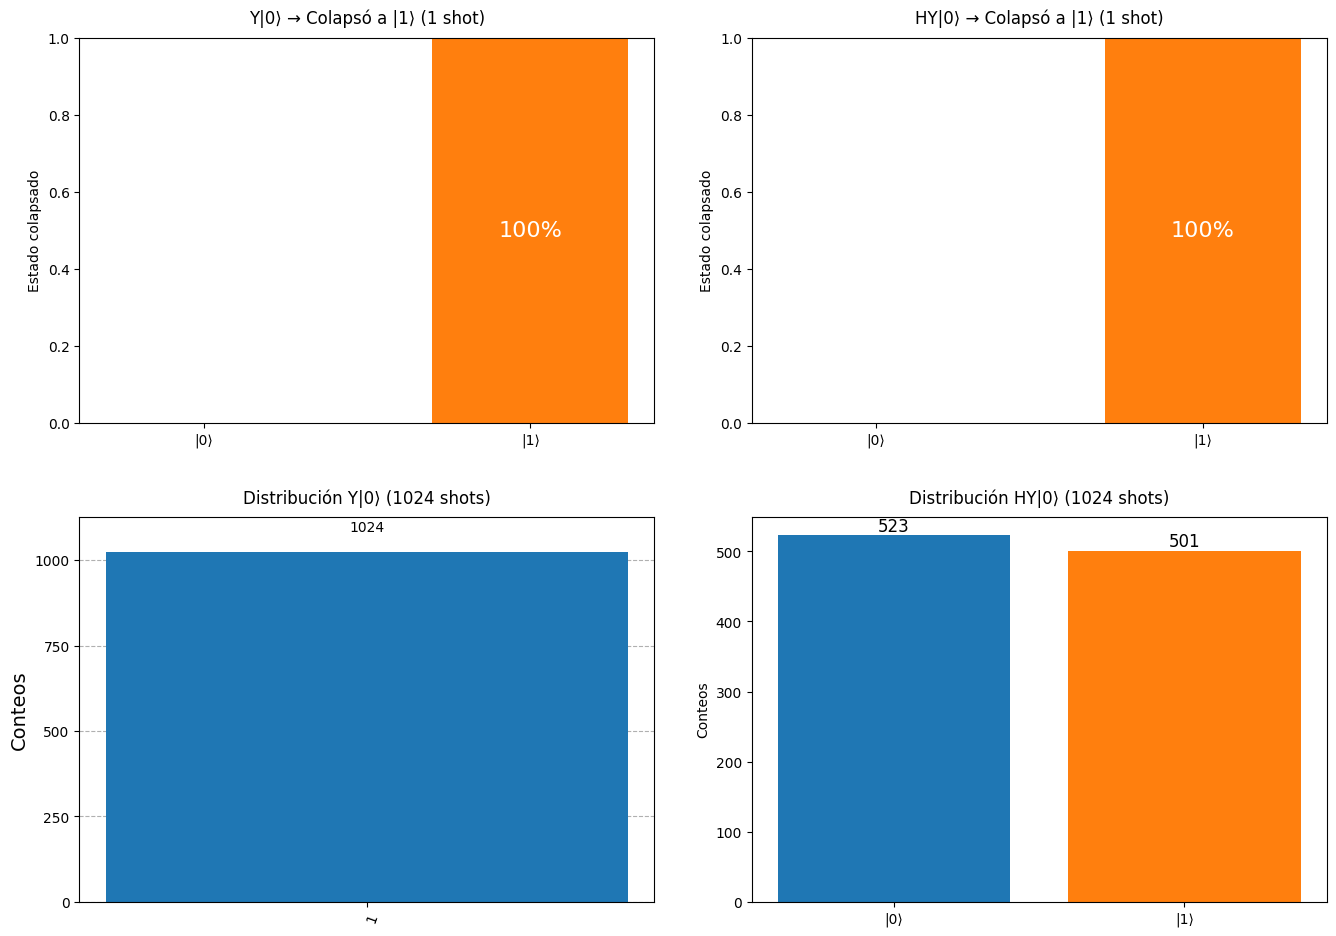

In [21]:
qc_not_H = QuantumCircuit(1, 1)
qc_not_H.y(0)  
qc_not_H.measure(0, 0)

qc_with_H = QuantumCircuit(1, 1)
qc_with_H.h(0)
qc_with_H.y(0) 
qc_with_H.measure(0, 0)

simulator = Aer.get_backend('qasm_simulator')


result_not_H = simulator.run(transpile(qc_not_H, simulator), shots=1, memory=True).result()
result_with_H = simulator.run(transpile(qc_with_H, simulator), shots=1, memory=True).result()
measure_not_H = result_not_H.get_memory()[0]
measure_with_H = result_with_H.get_memory()[0]


counts_not_H = simulator.run(transpile(qc_not_H, simulator), shots=1024).result().get_counts()
counts_with_H = simulator.run(transpile(qc_with_H, simulator), shots=1024).result().get_counts()


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.bar(['|0⟩', '|1⟩'], 
        [1 if measure_not_H == '0' else 0, 1 if measure_not_H == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("Y|0⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_not_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for i, val in enumerate([measure_not_H == '0', measure_not_H == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 2)
plt.bar(['|0⟩', '|1⟩'], 
        [1 if measure_with_H == '0' else 0, 1 if measure_with_H == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("HY|0⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_with_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for i, val in enumerate([measure_with_H == '0', measure_with_H == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 3)
plot_histogram(counts_not_H, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title("Distribución Y|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")


plt.subplot(2, 2, 4)
bars = plt.bar(['|0⟩', '|1⟩'], 
               [counts_with_H.get('0', 0), counts_with_H.get('1', 0)],
               color=['#1f77b4', '#ff7f0e'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.title("Distribución HY|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")

plt.tight_layout(pad=3.0)
plt.show()


### Circuito con medición 



Circuito con medición:


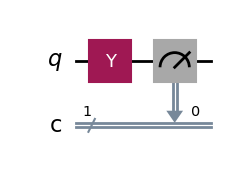

In [12]:
print("\nCircuito con medición:")
display(qc_measured.draw('mpl'))